In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
df_bank = pd.read_csv(r'phpkIxskf.csv')
df_bank.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


Input variables:  - 
bank client data:  
1 - age (numeric)   
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur",    "student","blue-collar","self-employed","retired","technician","services")   
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)   
4 - education (categorical: "unknown","secondary","primary","tertiary")   
5 - default: has credit in default? (binary: "yes","no")   
6 - balance: average yearly balance, in euros (numeric)   
7 - housing: has housing loan? (binary: "yes","no")   
8 - loan: has personal loan? (binary: "yes","no")  - related with the last contact of the current campaign:  
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")  
10 - day: last contact day of the month (numeric)  
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
12 - duration: last contact duration, in seconds (numeric)  - other attributes:  
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)   
15 - previous: number of contacts performed before this campaign and for this client (numeric)   
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") 

output variable (desired target):  
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [4]:
df_bank.rename(columns = {'V1': 'Age', 'V2' : 'Job Type','V3' : 'Marital Status',
                         'V4' : 'Education', 'V5' : 'Has Credit', 'V6' : 'Avg Yearly Balance(Euros)',
                         'V7' : 'Has Housing Loan','V8' : 'Has Personal Loan',
                         'V9' : 'Communication Type', 'V10' : 'Day', 'V11' : 'Month',
                         'V12' : 'Duration', 'V13' : 'Campaign', 'V14' : 'Pdays',
                         'V15' : 'Previous', 'V16' : 'Poutcome', 'V17' : 'Subscribed'
                         }, inplace=True)

In [5]:
df_bank.head()

,Age,Job Type,Marital Status,Education,Has Credit,Avg Yearly Balance(Euros),Has Housing Loan,Has Personal Loan,Communication Type,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        45211 non-null  int64 
 1   Job Type                   45211 non-null  object
 2   Marital Status             45211 non-null  object
 3   Education                  45211 non-null  object
 4   Has Credit                 45211 non-null  object
 5   Avg Yearly Balance(Euros)  45211 non-null  int64 
 6   Has Housing Loan           45211 non-null  object
 7   Has Personal Loan          45211 non-null  object
 8   Communication Type         45211 non-null  object
 9   Day                        45211 non-null  int64 
 10  Month                      45211 non-null  object
 11  Duration                   45211 non-null  int64 
 12  Campaign                   45211 non-null  int64 
 13  Pdays                      45211 non-null  int64 
 14  Previo

In [7]:
for col in df_bank.columns:
    count = df_bank[col][df_bank[col]=='unknown'].count()
    if(count!=0):
        print(col,count )

Job Type 288
Education 1857
Communication Type 13020
Poutcome 36959


In [8]:
print(df_bank[df_bank['Pdays']==-1][['Pdays']].count())
print(df_bank[df_bank['Poutcome']=='unknown'][['Poutcome']].count())

Pdays    36954
dtype: int64
Poutcome    36959
dtype: int64


- For every instance where there had not been a previous call to the client ie PDays = -1, the outcome of the previous marketing campaign is 'unknown' which is not the right representation, hence changing it to 'no call'
- Dropping the records with unknown PDays

In [9]:
df_bank['Poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: Poutcome, dtype: int64

In [10]:
df_bank['Poutcome'] = np.where((df_bank['Pdays']==-1) & (df_bank['Poutcome']=='unknown'), 'no call', df_bank['Poutcome'] ) 
df_bank['Poutcome'].value_counts()

no call    36954
failure     4901
other       1840
success     1511
unknown        5
Name: Poutcome, dtype: int64

In [11]:
df_bank.drop(df_bank[df_bank['Poutcome']=='unknown'].index, inplace=True)
df_bank['Poutcome'].value_counts()
#df_bank_copy[(df_bank['Pdays']==-1) & (df_bank['Poutcome']=='unknown')][['Pdays','Poutcome']].count()

no call    36954
failure     4901
other       1840
success     1511
Name: Poutcome, dtype: int64

In [12]:
for col in df_bank.columns:
    count = df_bank[col][df_bank[col]=='unknown'].count()
    if(count!=0):
        print(col,count)

Job Type 288
Education 1857
Communication Type 13020


In [13]:
df_bank.head()

,Age,Job Type,Marital Status,Education,Has Credit,Avg Yearly Balance(Euros),Has Housing Loan,Has Personal Loan,Communication Type,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no call,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no call,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no call,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no call,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no call,1


In [14]:
df_bank = df_bank.replace('unknown', np.NaN)
df_bank.head()

,Age,Job Type,Marital Status,Education,Has Credit,Avg Yearly Balance(Euros),Has Housing Loan,Has Personal Loan,Communication Type,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,no call,1
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,no call,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,no call,1
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,no call,1
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,no call,1


In [15]:
df_bank['Job Type'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

Converting all catogorical data to numeric to create a model

In [16]:
#df_bank['Job Type'].unique()
dict_job = {'management' : 1, 'technician'  :2, 'entrepreneur' : 3, 'blue-collar' : 4, 
       'retired' : 5, 'admin.' : 6, 'services' : 7, 'self-employed' : 8, 'unemployed' : 9,
       'housemaid' : 10, 'student' : 11}
df_bank['Job Type'] = df_bank['Job Type'].map(dict_job)

In [17]:
#df_bank['Education'].unique()
dict_edu = {'tertiary' : 3, 'secondary' : 2,  'primary ':1 }
df_bank['Education'] = df_bank['Education'].map(dict_edu)

In [18]:
#df_bank['Communication Type'].unique()
dict_comm = {'cellular':1, 'telephone':2}
df_bank['Communication Type'] = df_bank['Communication Type'].map(dict_comm)

In [19]:
#df_bank['Poutcome'].unique()
dict_outcome={'no call' : 1, 'failure' : 2, 'other' : 3, 'success':4}
df_bank['Poutcome'] = df_bank['Poutcome'].map(dict_outcome)

In [20]:
#df_bank['Month'].unique()
dict_month = {'jan':1, 'feb': 2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12 }
df_bank['Month'] = df_bank['Month'].map(dict_month)

In [21]:
df_bank['Marital Status'].unique()
dict_marital = {'married' : 1, 'single' : 2, 'divorced' : 3}
df_bank['Marital Status'] = df_bank['Marital Status'].map(dict_marital)

Converting all catogorical data to numerical values
Has Credit, Has Housing Loan, Has Personal Loan have binary values (yes : 1, no : 0)


In [22]:
df_bank['Has Credit'] = np.where(df_bank['Has Credit']=='yes', 1, 0)
df_bank['Has Housing Loan'] = np.where(df_bank['Has Housing Loan']=='yes', 1, 0)
df_bank['Has Personal Loan'] = np.where(df_bank['Has Personal Loan']=='yes', 1, 0)

In [23]:
df_bank.head()

,Age,Job Type,Marital Status,Education,Has Credit,Avg Yearly Balance(Euros),Has Housing Loan,Has Personal Loan,Communication Type,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Class
0,58,1.0,1,3.0,0,2143,1,0,NaN,5,5,261,1,-1,0,1,1
1,44,2.0,2,2.0,0,29,1,0,NaN,5,5,151,1,-1,0,1,1
2,33,3.0,1,2.0,0,2,1,1,NaN,5,5,76,1,-1,0,1,1
3,47,4.0,1,NaN,0,1506,1,0,NaN,5,5,92,1,-1,0,1,1
4,33,NaN,2,NaN,0,1,0,0,NaN,5,5,198,1,-1,0,1,1


In [24]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45206 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        45206 non-null  int64  
 1   Job Type                   44918 non-null  float64
 2   Marital Status             45206 non-null  int64  
 3   Education                  36498 non-null  float64
 4   Has Credit                 45206 non-null  int64  
 5   Avg Yearly Balance(Euros)  45206 non-null  int64  
 6   Has Housing Loan           45206 non-null  int64  
 7   Has Personal Loan          45206 non-null  int64  
 8   Communication Type         32186 non-null  float64
 9   Day                        45206 non-null  int64  
 10  Month                      45206 non-null  int64  
 11  Duration                   45206 non-null  int64  
 12  Campaign                   45206 non-null  int64  
 13  Pdays                      45206 non-null  int

In [25]:
##End of part one EDA

In [26]:
df_bank.to_csv('bank_subscribe_term_deposit.csv',index=False)

In [ ]:
##TO CSV - FOR MATLAB - DONE

<AxesSubplot:xlabel='Class', ylabel='Count'>

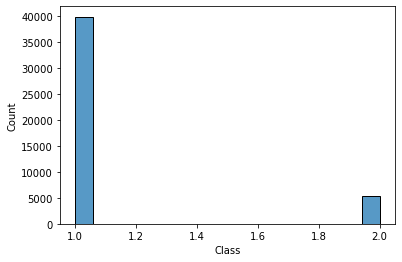

In [27]:
sns.histplot(df_bank['Class'])

In [26]:
df_bank_copy = df_bank.copy()
df_bank_copy.drop(columns=['Communication Type'], inplace = True)

In [27]:
df_bank_copy.to_csv('bank_subscribe_term_deposit_copydata.csv',index=False)

#

KNNImputer Data Transform

In [28]:
df_bank_copy_log = df_bank_copy.copy()
df_bank_copy_log.isna().sum()

Age                             0
Job Type                      288
Marital Status                  0
Education                    8708
Has Credit                      0
Avg Yearly Balance(Euros)       0
Has Housing Loan                0
Has Personal Loan               0
Day                             0
Month                           0
Duration                        0
Campaign                        0
Pdays                           0
Previous                        0
Poutcome                        0
Class                           0
dtype: int64

In [29]:
ix = [i for i in (df_bank_copy_log.columns) if i != 'Class']
ix

['Age',
 'Job Type',
 'Marital Status',
 'Education',
 'Has Credit',
 'Avg Yearly Balance(Euros)',
 'Has Housing Loan',
 'Has Personal Loan',
 'Day',
 'Month',
 'Duration',
 'Campaign',
 'Pdays',
 'Previous',
 'Poutcome']

In [30]:
X, y = df_bank_copy_log[ix], df_bank_copy_log['Class']

In [31]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
df_bank_copy_log = imputer.transform(X)


In [32]:
df_bank_copy_log.isna().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isna'

In [ ]:
df_bank_copy_log

In [ ]:
df_bank.shape

In [ ]:
im

In [28]:
df_bank['Job Type1'] = le.df_bank['Job Type']

NameError: name 'le' is not defined

In [ ]:
str_typecol = ['Job Type', 'Education','Communication Type', 'Marital Status', 'Poutcome']
def to_digit(i):
    if i in chars:
        return chars[i]
    else:
        chars[i] = len(chars)+1
        return chars[i]
    
for idx in str_typecol:
    chars = {}
    df_bank[idx] = df_bank[idx].map(to_digit)

df_bank.head()

In [ ]:
df_bank.isna().sum()

In [ ]:
#month_dict = {'jan':1, 'feb': 2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12 }

In [ ]:
#month_dict = {'jan':1, 'feb': 2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12 }
#df_bank_copy['Month'] = df_bank_copy['Month'].map(month_dict)
#df_bank_copy.head()

In [ ]:
df_bank_copy.info()

In [ ]:
df_bank_copy.isna().sum()

In [ ]:
#col=df_bank_copy.columns
#for i in range(1,len(col)) :
#    df_bank_copy.plot.scatter('Age',col[i], )

Creating a Scatter Plot of all features with respect to Age data, to identify potential outliers

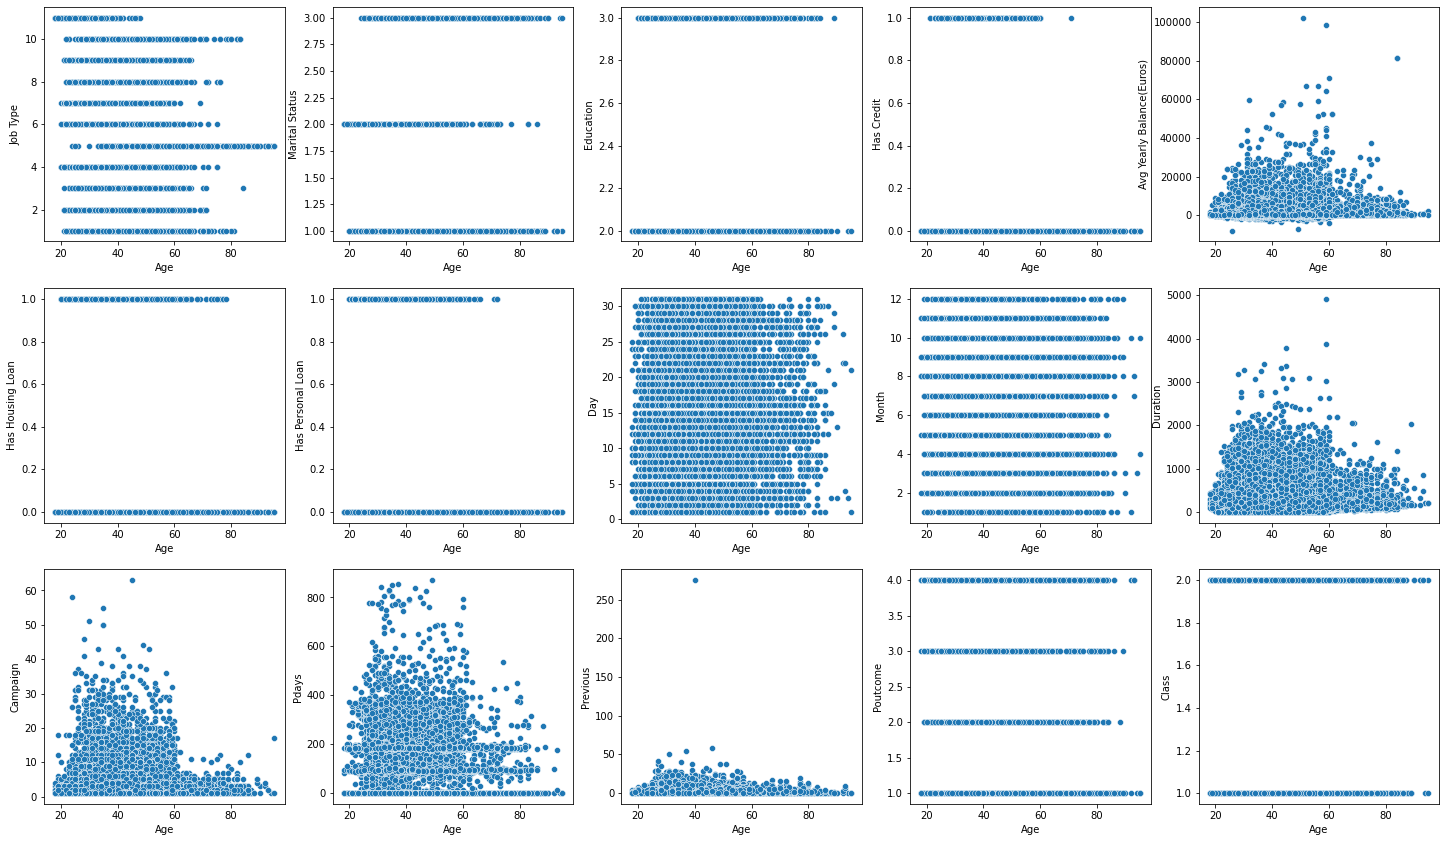

In [38]:
plt.figure(figsize=(25,25), facecolor='white')
plotnumber = 1

col=df_bank_copy.columns
for i in range(1,len(col)) :
    ax = plt.subplot(5,5,plotnumber)
    sns.scatterplot(x=df_bank_copy['Age'],y=df_bank_copy[col[i]], )
    plotnumber+=1
plt.show()

/Users/ashuttii/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Campaign'>

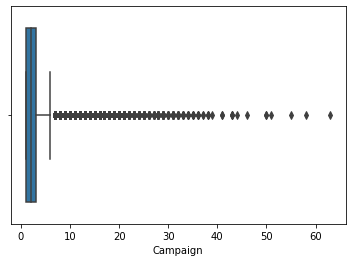

In [39]:
sns.boxplot(df_bank['Campaign'])

In [51]:
df_bank_cpy = df_bank.copy()
df_bank_cpy = np.log(df_bank_cpy)

#sns.boxplot(df_bank['Previous'])

/Users/ashuttii/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/ashuttii/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/ashuttii/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/ashuttii/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


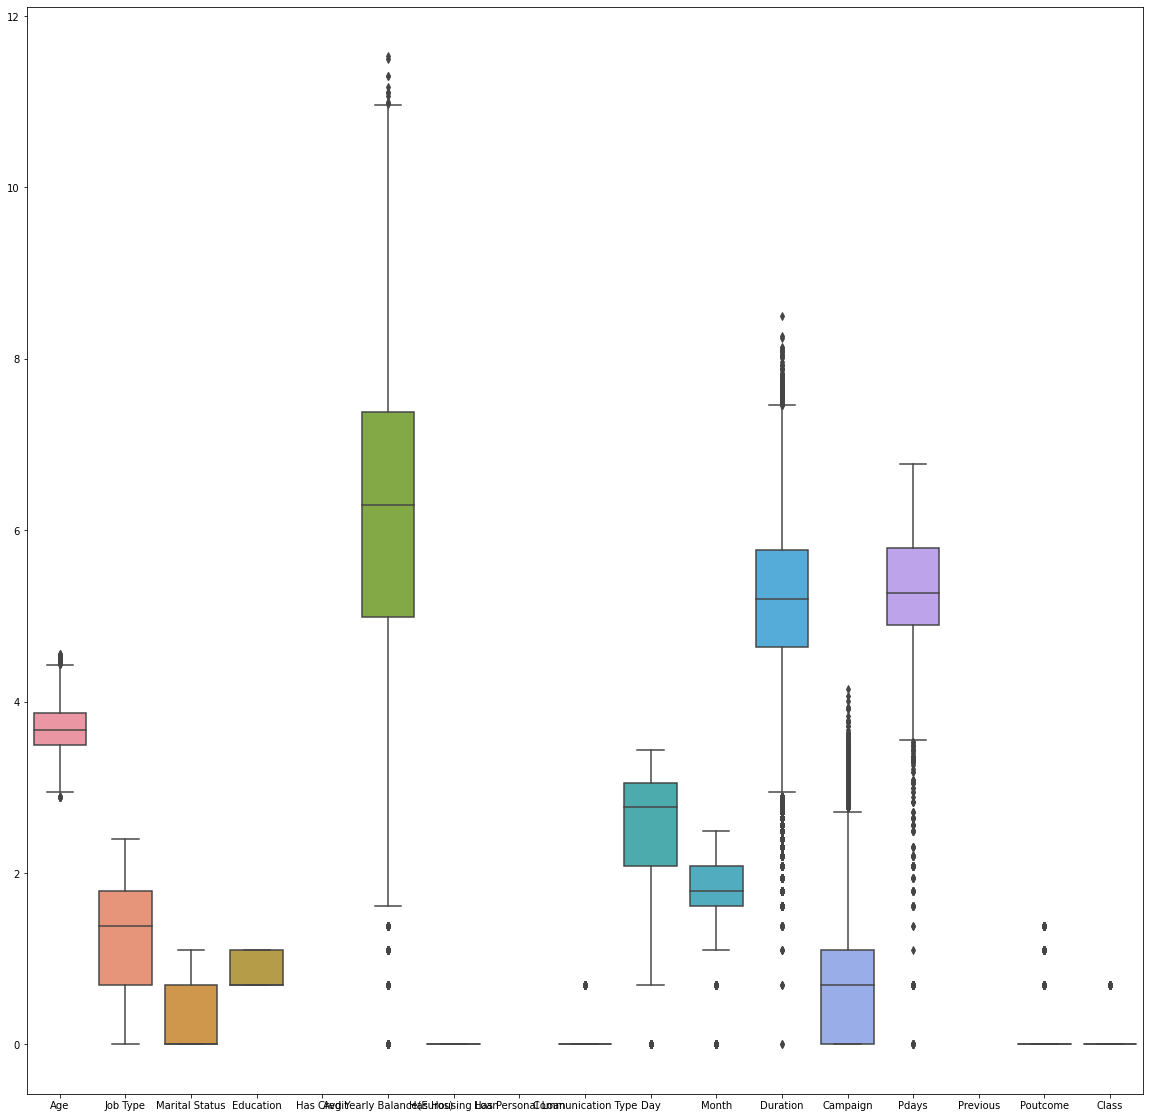

In [52]:
fig, ax = plt.subplots(figsize=(20,20))
chart = sns.boxplot(data = df_bank_cpy)

/Users/ashuttii/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pdays'>

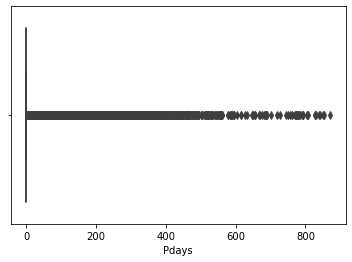

In [40]:
sns.boxplot(df_bank['Pdays'])

In [ ]:
outlierCol = ['Duration', 'Campaign', 'Pdays','Previous']
for i in outlierCol:
    # create new columns, filled with 0s
    df_bank_copy['isOutlier_'+i] = 0 
    

    # calculate the mean and standard deviations
    meanVal = df_bank_copy[i].mean()
    stdDevVal = df_bank_copy[i].std()
    
    df_bank_copy['isOutlier_'+i] = np.where(abs(df_bank_copy[i] - meanVal) > 2 * stdDevVal, 1, 0)
    #df_bank_copy['isOutlierMileage'] = np.where(abs(cars['mileage'] - meanMil) > 2 * stdDevPrice, 1, 0)
df_bank_copy.head()  

In [ ]:
df_bank_copy['isOutlier_Duration'].value_counts()

In [ ]:
df_bank_copy['isOutlier_Campaign'].value_counts()


In [ ]:
df_bank_copy[df_bank_copy['Campaign'] > 50] .shape

In [ ]:
df_bank_copy[df_bank_copy['Duration'] > 3000].shape 
    #) / len(df_bank_copy) * 100

In [ ]:
df_bank_copy[df_bank_copy['Pdays'] > 800].shape
#/ len(df_bank_copy) * 100

In [ ]:
df_bank_copy[df_bank_copy['Previous'] > 250].shape

In [ ]:
df_bank_copy.shape

In [ ]:
df_bank_copy.drop(df_bank_copy[df_bank_copy['Campaign'] > 50].index, inplace=True)
df_bank_copy.shape

In [ ]:
df_bank_copy.drop(df_bank_copy[df_bank_copy['Duration'] > 3000].index, inplace=True)
df_bank_copy.shape

In [ ]:
df_bank_copy.drop(df_bank_copy[df_bank_copy['Pdays'] > 800].index, inplace=True)
df_bank_copy.shape

In [ ]:
df_bank_copy.drop(df_bank_copy[df_bank_copy['Previous'] > 250].index, inplace=True)
df_bank_copy.shape

In [ ]:
for col in df_bank.columns:
    count = df_bank[col][df_bank[col]=='unknown'].count()
    if(count!=0):
        print(col,count)

In [ ]:
df_bank['Month'].unique()

In [ ]:
a = df_bank['Age'].max()
print(a)

In [ ]:
df_bank.columns

In [ ]:
df_bank.info()

In [ ]:
df_bank.shape

In [36]:
new_df = df_bank.copy()

/Users/ashuttii/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ashuttii/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ashuttii/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

OverflowError: cannot convert float infinity to integer

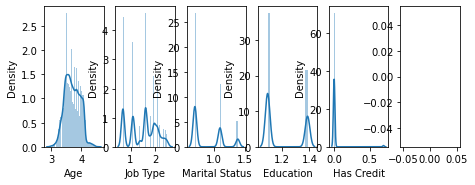

In [37]:
colu=  ['Age',
 'Job Type',
 'Marital Status',
 'Education',
 'Has Credit',
 'Avg Yearly Balance(Euros)',
 'Has Housing Loan',
 'Has Personal Loan',
 'Day',
 'Month',
 'Duration',
 'Campaign',
 'Pdays',
 'Previous',
 'Poutcome']
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for col in colu:
    new_df[col]+=1
    
    ax = plt.subplot(5,8,plotnumber)
    sns.distplot(np.log(new_df[col]))
    #plt.xlable(col, fontsize=10)
    plotnumber+=1
plt.show()

In [1]:
sns.histogram(df_bank['Class'])

NameError: name 'sns' is not defined

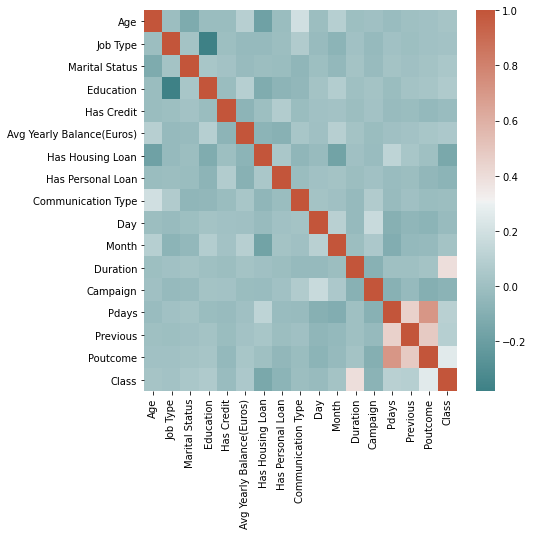

In [45]:
cmap = sns.diverging_palette(200, 20, as_cmap=True)
plt.figure(figsize=(7,7))
sns.heatmap(df_bank.corr(),  annot=False, fmt='.1g', cmap=cmap, cbar=True)
plt.show()